# Sample Dataset

In [6]:
import pandas as pd

pizza = {'diameter':[6, 8, 10, 14, 18],
         'harga': [7, 9, 13, 17.5, 18]}

pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


Visualisasi Data

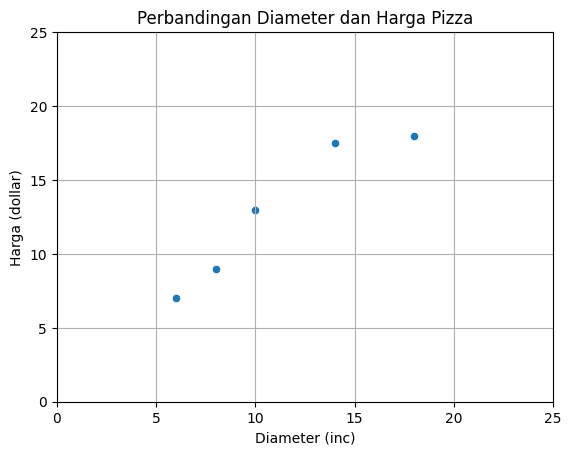

In [7]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inc)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()


# Simple Linier Regression Model

## Penyesuaian Dataset

In [8]:
import numpy as np

X = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'X: {X}')
print(f'y: {y}')

X: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [9]:
X = X.reshape(-1, 1)
X.shape

(5, 1)

In [10]:
X

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]])

## Training Simple Linier Regression Model

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Visualisasi Simple Linear Regression Model

In [12]:
X_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(X_vis)

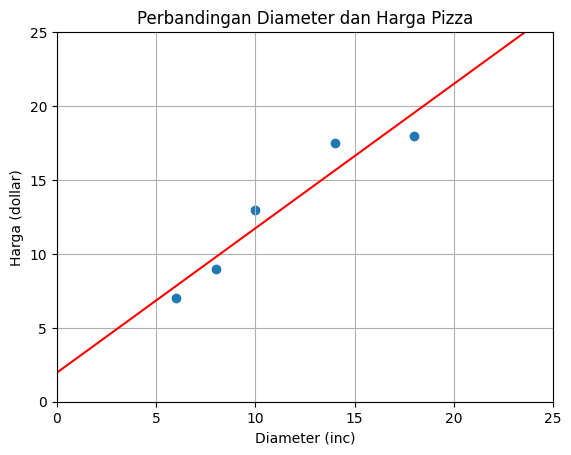

In [13]:
plt.scatter(X, y)
plt.plot(X_vis, y_vis, '-r')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inc)')
plt.ylabel('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()


# Formula Linear Regression: y = a + bx
y = response variable
x = explanatory variable
a = intercept
b = slope

In [15]:
print(f'Intercept: {model.intercept_}')
print(f'Slope: {model.coef_}')

Intercept: 1.965517241379315
Slope: [0.9762931]


## Mencari nilai Slope

Nilai slope pada Linear Regression dapat diperoleh dengan menggunakan formula sebagai berikut

B = cov(X,y) / var(X)

In [16]:
print(f'X:\n{X}\n')
print(f'X flatten: {X.flatten()}\n')
print(f'y: {y}')

X:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

X flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


### Variance (var)

In [17]:
variance_x = np.var(X.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 23.2


### Covariance (Cov)

In [18]:
np.cov(X.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [19]:
covariance_xy = np.cov(X.flatten(), y)[0][1]

print(f'covariance : {covariance_xy}')

covariance : 22.650000000000002


### Slope

In [20]:
slope = covariance_xy / variance_x

print(f'slope: {slope}')

slope: 0.976293103448276


# Mencari Nilai Intercept

Nilai intercept pada Linear Regression bisa diperoleh dengan menggunakan rumus berikut:

a = mean(y) - b * mean(x)

In [29]:
intercept = np.mean(y) - slope * np.mean(X)

print(f'Intercept: {intercept}')

Intercept: 1.9655172413793096


# Prediksi Harga Pizza

In [22]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [23]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [24]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter: {dmtr} Prediksi Harga: {hrg}')

Diameter: [12] Prediksi Harga: 13.681034482758621
Diameter: [20] Prediksi Harga: 21.491379310344826
Diameter: [23] Prediksi Harga: 24.42025862068965


# Evaluasi Simple Linear Regression Model

### Training & Testing Dataset

In [26]:
X_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

X_test = np.array([8, 9, 11, 16, 12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18, 11])

### Training Simple Linear Regression Model

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### Evaluasi Linear Regression Model dengan Coefficient of Determination atau R-Squared

In [28]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)

print(f'R-Squared: {r_squared}')

R-Squared: 0.6620052929422553


### R-Squared (Matematis)

https://en.wikipedia.org/wiki/Coefficient_of_determination